In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit


plt.rcParams['lines.linewidth'] = 1
plt.rcParams['scatter.marker'] = "x"

abc


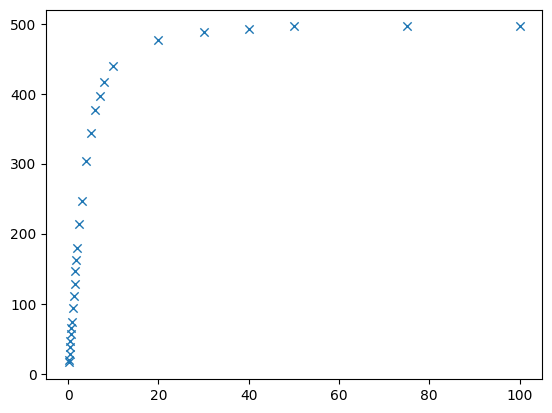

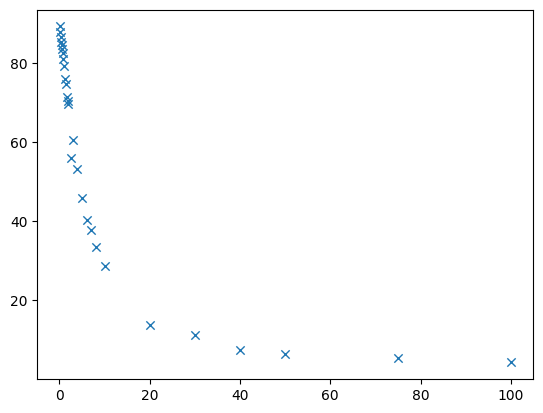

In [2]:
# HOCHPASS DURCHLASSKURVE
hochpassIn = np.array([5,])
#in v
hochpassOut = np.array([16, 19.4, 28.6, 38.0, 47.2, 56.4, 65.2, 74, 93.6, 111, 128, 146, 162, 180, 214, 246, 304, 344, 376, 396, 416, 440, 476, 488, 492, 496, 496, 496

])
print("abc")
#in mV
frequenz = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.00, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 20.0, 30.0, 40.0, 50.0, 75.0, 100])
#in kHz
phasenverschiebung = np.array([89.2, 87.8, 86.6, 85.4, 84.6, 83.4, 82.4, 80.9, 79.2, 75.9,  74.6, 71.5, 70.4, 69.6, 56.1, 60.5, 53.2,  45.9, 40.3, 37.8, 33.6, 28.8, 13.9, 11.2, 7.5, 6.5, 5.4, 4.32 ])

plt.scatter(frequenz, hochpassOut)
plt.subplots()
plt.scatter(frequenz, phasenverschiebung)

In [3]:
##schwingkreis
#mV
frequenzSchwingkreis = np.array([50.0,
                      55,
                     60, 
                     62,
                      64,
                      66,
                      67,
                      68,
                      68.5,
                      69,
                      69.5,
                      70,
                      70.5,
                      71,
                      72,
                      73,
                      74,
                      76,
                      78,
                      80,
                      85,
                      90])

uOutSchwingkreis = np.array([133,
                 180,
                 254,
                 292,
                 334,
                 378,
                 394,
                 408,
                 412,
                 416,
                 416,
                 416,
                 412,
                 408,
                 396,
                 384,
                 364,
                 332,
                 300,
                 268,
                 210,
                 172
                 ])

phaseSchwingkreis = np.array([71,
                  66,
                  53.5,
                  44.6,
                  36.0,
                  24.7,
                  18,
                  10.7,
                  8.5,
                  3.98,
                  0,
                  -4,
                  -6.5,
                  -11.2,
                  -16.6,
                  -21.5,
                  -27.2,
                  -37.2,
                  -42.6,
                  -50.6,
                  -61.1,
                  -67.4

                  ])


uInSchwingkreis = 4.96

uDataSchwingkreisRelToIn = 0.001 * uOutSchwingkreis / uInSchwingkreis
fDataSchwingkreisHz = frequenzSchwingkreis * 1000

phiDataSchwingkreisRad = 2 * np.pi * phaseSchwingkreis / 360.0




In [4]:
def durchgangTheoriekurve(fData, measureRhoParam, rhoParam, resoParam):
    return measureRhoParam * fData / np.sqrt((fData*rhoParam)**2.0 + (fData**2.0 - resoParam**2.0)**2.0)

def phaseTheoriekurve(fData, rhoParam, resoParam):
    return -np.arctan((fData **2.0 - resoParam**2.0) / (rhoParam * fData))
def smoothLinSpaceFromXData(xData):
    return np.linspace(np.min(xData), np.max(xData), 500)
def pCovToError(pCov):
    return np.sqrt(np.diag(pCov))

durchgangStartParams = np.array([13000,10000, 66690])
phaseStartParams = np.array([10000, 72000])
durchgangSchwingkreisPopt, durchgangSchwingkreisPcov = fit(durchgangTheoriekurve, fDataSchwingkreisHz, uDataSchwingkreisRelToIn, sigma=0.5*np.ones_like(fDataSchwingkreisHz), p0=durchgangStartParams)
phaseSchwingkreisPopt, phaseSchwingkreisPcov = fit(phaseTheoriekurve, fDataSchwingkreisHz, phiDataSchwingkreisRad,sigma=0.5*np.ones_like(fDataSchwingkreisHz), p0=phaseStartParams)

measureRhoFittedDurchgang, rhoFittedDurchgang, resoFittedDurchgang = durchgangSchwingkreisPopt
rhoFittedPhase, resoFittedPhase = phaseSchwingkreisPopt
resoDurchgangError = pCovToError(durchgangSchwingkreisPcov)[2]
resoPhaseError = pCovToError(phaseSchwingkreisPcov)[1]

rhoDurchgangError = pCovToError(durchgangSchwingkreisPcov)[1]
rhoPhaseError = pCovToError(phaseSchwingkreisPcov)[0]

print(phiDataSchwingkreisRad)




linsp = smoothLinSpaceFromXData(fDataSchwingkreisHz)
def getWeightedMeanAndExternalUnsure(values, unsures):
    weights = 1/((unsures**2.0) * np.sum(1/(unsures**2.0)))
    weightedMean = np.dot(values, weights)
    extUnsure = np.sqrt((np.sum(np.dot(weights, (values-weightedMean) * (values -weightedMean))))/(len(values)-1))
    return weightedMean, extUnsure

weightedMeanReso, weightedMeanResoErr = getWeightedMeanAndExternalUnsure(np.array([resoFittedDurchgang, resoFittedPhase]), np.array([resoDurchgangError, resoPhaseError]))
print("Ergebnis für Resonanzfrequenz: \nVia Durchgang: ({}+/-{})Hz\nVia Phase: ({}+/-{})Hz\n Weighted mean: ({}+/-{})Hz".format(resoFittedDurchgang, resoDurchgangError, resoFittedPhase, resoPhaseError, weightedMeanReso, weightedMeanResoErr))

weightedMeanRho, weightedMeanRhoErr = getWeightedMeanAndExternalUnsure(np.array([rhoFittedDurchgang, rhoFittedPhase]), np.array([rhoDurchgangError, rhoPhaseError]))
print("Ergebnis für rho aka bandbreite:\nDurchgang: ({}+/-{})\nPhase: ({}+/-{})\nWeighted mean: ({}+/-{})".format(rhoFittedDurchgang, rhoDurchgangError, rhoFittedPhase, rhoPhaseError, weightedMeanRho, weightedMeanRhoErr))

guete = weightedMeanReso / weightedMeanRho
gueteDelReso = 1 / weightedMeanRho
gueteDelRho = - weightedMeanReso / weightedMeanRho ** 2.0
gueteErr = np.sqrt(  (gueteDelRho * weightedMeanRhoErr)**2.0     +    (gueteDelReso * weightedMeanResoErr)**2.0)

print("Guete: ({}+/-{})".format(guete, gueteErr))






[ 1.23918377  1.15191731  0.93375115  0.77841685  0.62831853  0.43109633
  0.31415927  0.18675023  0.14835299  0.0694641   0.         -0.06981317
 -0.1134464  -0.19547688 -0.28972466 -0.37524579 -0.47472956 -0.64926248
 -0.74351026 -0.8831366  -1.06639617 -1.17635192]
Ergebnis für Resonanzfrequenz: 
Via Durchgang: (69651.34502831024+/-31.97995112456901)Hz
Via Phase: (69582.58350963012+/-38.851620591681574)Hz
 Weighted mean: (69623.57291488489+/-33.73962673138721)Hz
Ergebnis für rho aka bandbreite:
Durchgang: (16191.28437206108+/-88.03830523769884)
Phase: (16017.616642471647+/-164.89286818414047)
Weighted mean: (16152.760087069379+/-72.15472662579255)
Guete: (4.310320498762315+/-0.019367262827627213)


In [2]:
from scipy.signal import find_peaks as peaks
plt.figure(figsize=(8,2.5))
plt.scatter(fDataSchwingkreisHz / 1000, uDataSchwingkreisRelToIn * 100, label="Messdaten")
plt.plot(linsp / 1000,100*durchgangTheoriekurve(linsp, measureRhoFittedDurchgang, rhoFittedDurchgang, resoFittedDurchgang), label="Theorie-Fit")
plt.xlabel("f in kHz")
plt.ylabel(r"$\frac{U_A}{U_E}$ in %")
plt.ylim(2.5,9)
plt.vlines(weightedMeanReso/1000, 0, 10, color="r", label=r"$f_0$")
plt.axvspan((weightedMeanReso - weightedMeanRho/2)/1000, (weightedMeanReso + weightedMeanRho/2)/1000, color="g", alpha=0.2, label="Zentrierte\nBandbreite")
plt.xlim(50,90)
plt.legend(loc="upper right")


NameError: name 'plt' is not defined

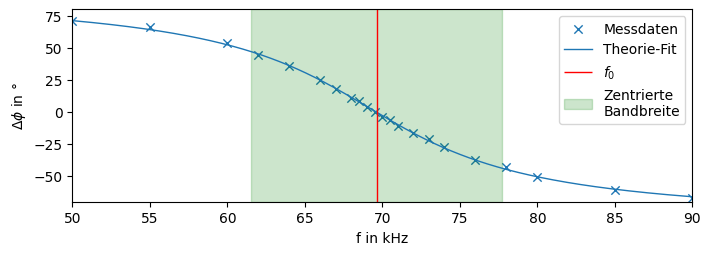

In [ ]:

plt.figure(figsize=(8,2.5))
plt.scatter(fDataSchwingkreisHz/1000, phaseSchwingkreis, label="Messdaten")
plt.plot(linsp/1000.0, 180.0 * phaseTheoriekurve(linsp, rhoFittedPhase, resoFittedPhase) / np.pi, label="Theorie-Fit")
plt.vlines(weightedMeanReso/1000, -80, 80, color="r", label=r"$f_0$")
plt.ylim(-70,80)
plt.xlim(50,90)
plt.axvspan((weightedMeanReso - weightedMeanRho/2)/1000, (weightedMeanReso + weightedMeanRho/2)/1000, color="g", alpha=0.2, label="Zentrierte\nBandbreite")
plt.xlabel("f in kHz")
plt.ylabel(r"$\Delta \phi$ in °")

plt.legend()

Durch daempung bestimmt: rho = (15972.177809180896+/-297.7782106611798)
Daempfungskonstante:
Via resonanz: (5141.58322486913+/-22.96756281987856)Hz
Via Abklingen: (5084.102100547638+/-94.78574834357299)Hz


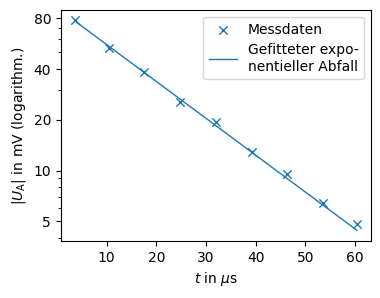

In [ ]:
#daempfungskonstante

plt.figure(figsize=(4,3))
def abfallTheorie(tData, lambdaParam, aParam):
    return aParam * np.exp(- np.pi * tData * lambdaParam)

zeitDaempfungMikroSekunden = np.array([3.6,
                 10.4,
                 17.6,
                 24.8,
                 32,
                 39.2,
                 46.4,
                 53.6,
                 60.4#,
                 #67.6
                 ])


amplitudeDaempfungMilliVolt = np.abs(np.array([77.6,
                              -52.8,
                              38.4,
                              -25.6,
                              19.4,
                              -12.8,
                              9.6,
                              -6.4,
                              4.8#,
                              #-2.4
                              ]))

uDataDaempfungVolt = amplitudeDaempfungMilliVolt / 1000.0
tDataDaempfungSeconds = zeitDaempfungMikroSekunden / (1000.0 * 1000.0) 

daempfungFitPopt, daempfungFitPCov = fit(abfallTheorie, tDataDaempfungSeconds, uDataDaempfungVolt)
rhoDaempfungFitted = daempfungFitPopt[0]
rhoDaempfungErr = pCovToError(daempfungFitPCov)[0]

plt.scatter(zeitDaempfungMikroSekunden, amplitudeDaempfungMilliVolt, label="Messdaten")
plt.xlabel(r"$t$ in $\mu \text{s}$")
plt.ylabel(r"$|U_\text{A}|$ in mV (logarithm.)")
plt.yscale("log")
yTicks = np.array([5,10, 20, 40, 80])

linsp = smoothLinSpaceFromXData(tDataDaempfungSeconds)
plt.plot(tDataDaempfungSeconds * 1000.0 * 1000.0, 1000.0 * abfallTheorie(tDataDaempfungSeconds, rhoDaempfungFitted, daempfungFitPopt[1]), label="Gefitteter expo-\nnentieller Abfall")

plt.yticks(ticks=yTicks, labels=yTicks)
plt.legend()

print("Durch daempung bestimmt: rho = ({}+/-{})".format(rhoDaempfungFitted, rhoDaempfungErr))

daempungskonstanteReso = weightedMeanRho / np.pi
daempfungkonstanteResoErr = weightedMeanRhoErr / np.pi
daempfungskonstanteDaempfuns = rhoDaempfungFitted / np.pi
daempungskonstanteDaempungErr = rhoDaempfungErr / np.pi

print("Daempfungskonstante:\nVia resonanz: ({}+/-{})Hz\nVia Abklingen: ({}+/-{})Hz".format(daempungskonstanteReso, daempfungkonstanteResoErr, daempfungskonstanteDaempfuns, daempungskonstanteDaempungErr))

In [ ]:
############ Koaxialkabel
kabelLaengeMeter = 10
fResOhneKabel = 70310
fResMitKabel = 63500
induktivitaetParallelSchwingkreis = 0.0012